In [34]:
! pip install numpy matplotlib scikit-learn scipy pandas

  Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-macosx_11_0_arm64.whl (11.3 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]


In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 


# PCA using scikit-learn

## Random matrix X

In [11]:
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 3)

## 3d scatter plot of the random matrix X

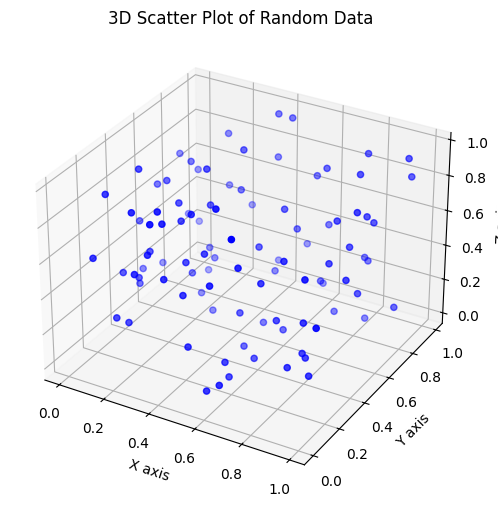

In [ ]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter the data
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='blue', marker='o')

# Set axis labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scatter Plot of Random Data')

# Show the plot
plt.show()

## Sklearn pca code along with the scatter plot 

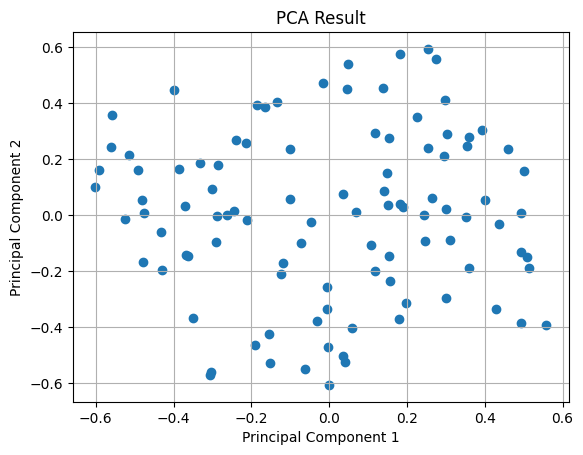

In [26]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=3)
x2d = pca.fit_transform(X)
plt.scatter(x2d[:, 0], x2d[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.title('PCA Result')
plt.show()


## variance percentage in each eigen vector

In [21]:
pca.explained_variance_ratio_

array([0.37743432, 0.33646087, 0.28610481])

## choosing 95% variance pca components using cumsum

In [36]:
from sklearn.datasets import fetch_openml 

mnist = fetch_openml('mnist_784',as_frame=False) 
X_train , y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # Number of components for 95% variance
print(f"Number of components for 95% variance: {d}")
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
print(f"Reduced shape: {X_reduced.shape}")

Number of components for 95% variance: 154
Reduced shape: (60000, 154)


## elbow graph for cumsum

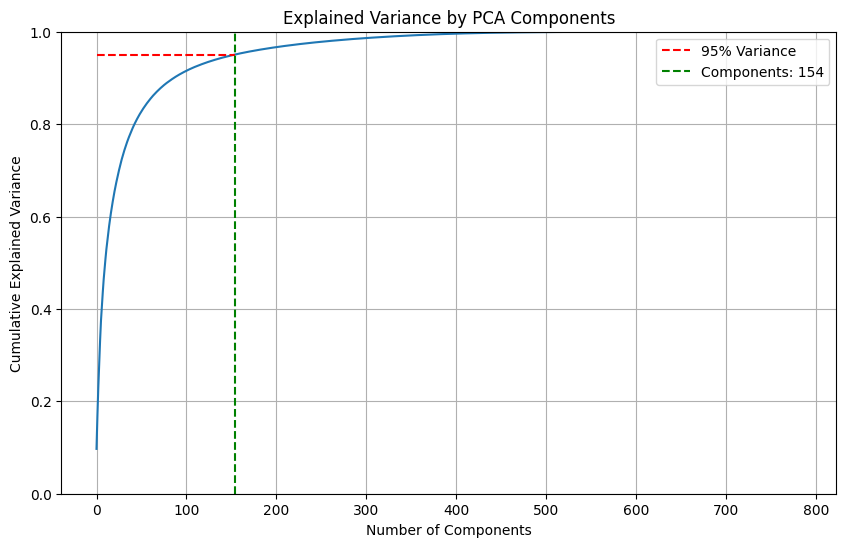

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cumsum)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.ylim(0, 1)
plt.hlines(y=0.95, xmin=0, xmax=len(pca.explained_variance_ratio_), color='r', linestyle='--', label='95% Variance')
plt.axvline(x=d, color='g', linestyle='--', label=f'Components: {d}')
plt.legend()
plt.grid()
plt.show()

## Hyperparameter tuning for pca and random forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=42),
                   RandomForestClassifier(random_state=42))
param_distributions = {
    "pca__n_components": np.arange(10, 100, 10),
    "randomforestclassifier__n_estimators": np.arange(10, 200, 50),
}

rnd_search = RandomizedSearchCV(clf,param_distributions,n_iter=10,cv=3,verbose=2,random_state=42)
rnd_search.fit(X_train, y_train)
print(f"Best parameters: {rnd_search.best_params_}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END pca__n_components=90, randomforestclassifier__n_estimators=160; total time=  56.3s
[CV] END pca__n_components=90, randomforestclassifier__n_estimators=160; total time=  56.8s
[CV] END pca__n_components=90, randomforestclassifier__n_estimators=160; total time=  56.1s
[CV] END pca__n_components=40, randomforestclassifier__n_estimators=60; total time=  15.0s
[CV] END pca__n_components=40, randomforestclassifier__n_estimators=60; total time=  14.7s
[CV] END pca__n_components=40, randomforestclassifier__n_estimators=60; total time=  14.6s
[CV] END pca__n_components=70, randomforestclassifier__n_estimators=110; total time=  34.6s
[CV] END pca__n_components=70, randomforestclassifier__n_estimators=110; total time=  34.4s
[CV] END pca__n_components=70, randomforestclassifier__n_estimators=110; total time=  34.9s
[CV] END pca__n_components=80, randomforestclassifier__n_estimators=110; total time=  34.4s
[CV] END pca__n_compon

In [51]:
print(f"best parameters: {rnd_search.best_params_}")

best parameters: {'randomforestclassifier__n_estimators': np.int64(160), 'pca__n_components': np.int64(80)}


## Incremental pca 

In [52]:
from sklearn.decomposition import IncrementalPCA 

n_batches = 100
inc_pca = IncrementalPCA(n_components= 154)
for x_batch in np.array_split(X_train,n_batches):
    inc_pca.partial_fit(x_batch)

X_reduced = inc_pca.transform(X_train)

In [54]:
print(X_reduced.shape)

(60000, 154)


# RANDOM PROJECTION

In [55]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim 
m,e = 5_000, 0.1
d = johnson_lindenstrauss_min_dim(m,eps=e)
d

np.int64(7300)

In [56]:
n = 20_000
np.random.seed(42)
p = np.random.randn(d,n)/np.sqrt(d)

X = np.random.randn(m,n)
X_reduced = X @ p.T

In [58]:
X_reduced.shape

(5000, 7300)

## random projection using gaussianrandomprojection

In [65]:
from sklearn.random_projection import GaussianRandomProjection 

gaussian_rnd_projt = GaussianRandomProjection(eps = 0.1,random_state=42)
X_reduced = gaussian_rnd_projt.fit_transform(X)

In [64]:
X_reduced.shape

(5000, 7300)

# LLE LOCALLY LINEAR EMBEDDING

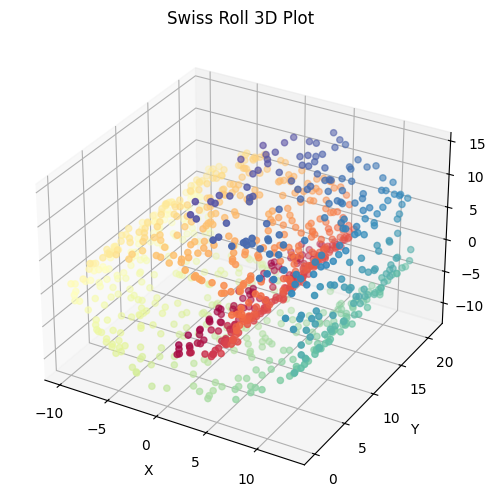

In [67]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting
import numpy as np

# Generate Swiss Roll data
X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Plot in 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Use the color t to color the points
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=plt.cm.Spectral)

ax.set_title("Swiss Roll 3D Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()


In [71]:
from sklearn.manifold import LocallyLinearEmbedding

X_swiss,t = make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10,random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

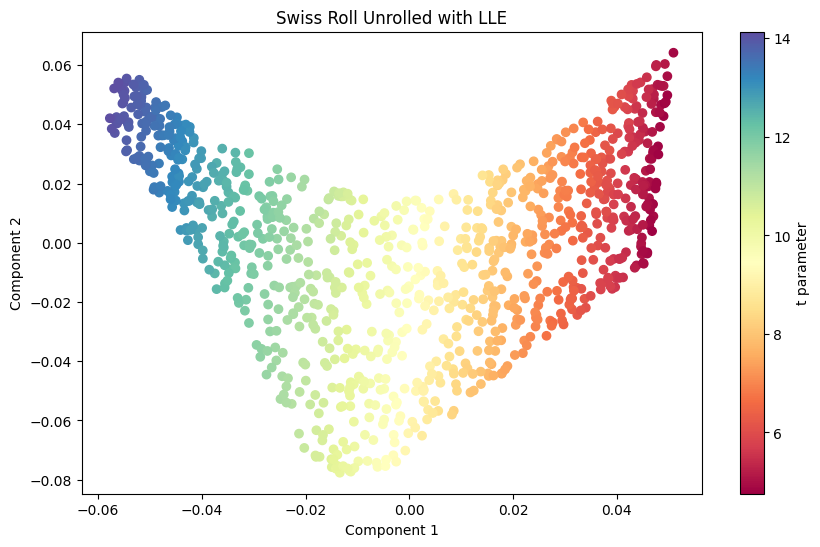

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title("Swiss Roll Unrolled with LLE")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label='t parameter')
plt.show()

## MDS

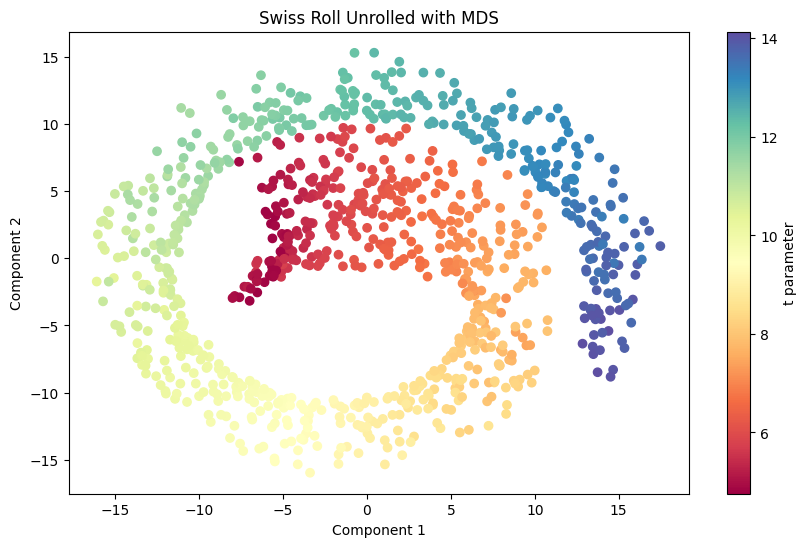

In [75]:
from sklearn.manifold import MDS

# Apply MDS to the Swiss Roll data
mds = MDS(n_components=2, random_state=42, n_init=4, max_iter=300)
X_mds = mds.fit_transform(X_swiss)

# Plot the MDS result
plt.figure(figsize=(10, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title("Swiss Roll Unrolled with MDS")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label='t parameter')
plt.show()

## isomap


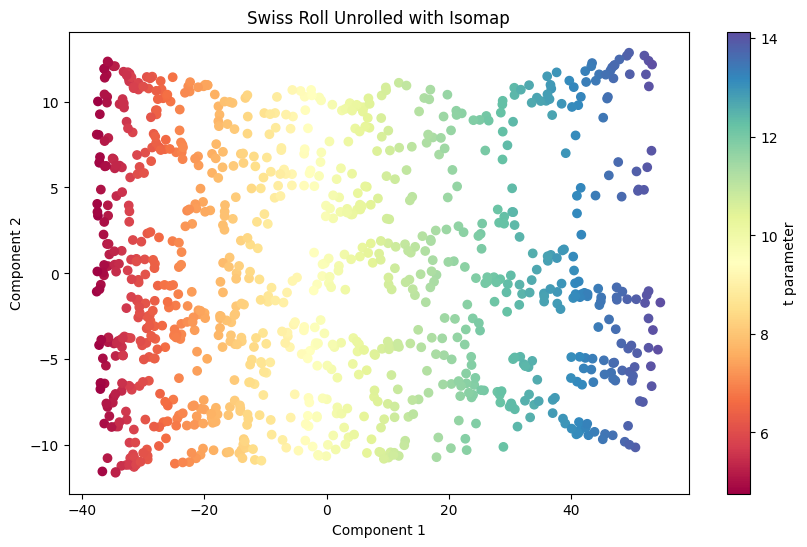

In [76]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2, n_neighbors=10)
X_iso = isomap.fit_transform(X_swiss)

plt.figure(figsize=(10, 6))
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title("Swiss Roll Unrolled with Isomap")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label='t parameter')
plt.show()

## T-sne

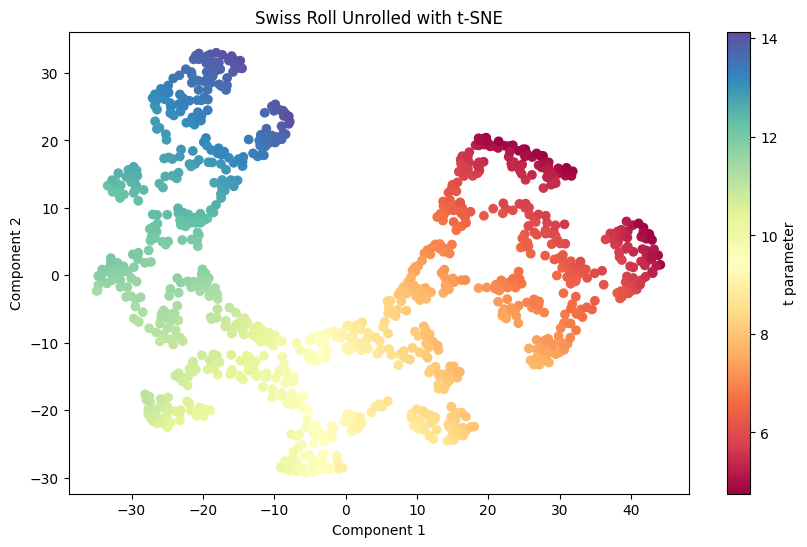

In [77]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_swiss)

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=t, cmap=plt.cm.Spectral)
plt.title("Swiss Roll Unrolled with t-SNE")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label='t parameter')
plt.show()

# EXCERCISES


1. we use dimensionality reduction to reduce the features so that the model would abel to learn from the data where the features are important because as the number of features or dimension increases the the data becomes more sparse thereby unrelated noise is created in the data to solve this we use dimensionality reduction . Its also helps in visuzaling higer dimension datasets haveing more than 3 features
the main drawback is dimensionality reduction won't gaurentee that the reduced dataset is enough to train the model . once the data is reduced it cannot to be converted back to original well it can be reversed and looks similar but it won't have all the information that orginal dataset has 

2. as humans we cannot imaginge dimension that are higher than 3 dimensions . Most of the higher dimension datapoints lies at the corners . where as lesser dimension lie randomly and any point in the dimesniosn. the randomly sampled high dimensional vectors are far from each other there by causing overfitting without having plenty of data

3. yes the dataset could be reversed back it may loose some information when it is being reversed back few algo like pca have a simple revesr transformation other algo liek t-SNE do not have reverse transformation 

4. no pca is used better for linear dataset it is not usefull of nonlinear dataset as pca does projection from a higher dimension to lower dimension . Where datapoints might get overlapped even though top eigenvectors choosen . For onlinear dataset manifold is used since it uses k-nearest neighour technique to to visually nonlinear dataset in 2d space

5. cannot say it depends on the dataset you are using if there is high variance in the dataset less dimension are enough to store 95% of the information . If the datset is densely packed then more dimension might be required 

6. You use regular pca if you computer have enought memory to store the entire dataset at one go . else if the system cannot hold all the dataset incremental pca is used , randomized pca is used for fastness .

7. you use can check through cumsum function which gives you percentage fo how much information is in each principle component . Your can simple use the randomized search cv using the pca and any model for training like random forest the one that give best result is the bes pca of the dataset

8.

9 MNIST DATASET Problem

In [78]:
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

withou pca


In [79]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state =42)

In [80]:
%time rnd_clf.fit(X_train,y_train)

CPU times: user 25.7 s, sys: 424 ms, total: 26.2 s
Wall time: 26.8 s


RandomForestClassifier(random_state=42)

In [81]:
from sklearn.metrics import accuracy_score 

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test,y_pred)


0.9691

with pca

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [83]:
rnd_clf_with_pca = RandomForestClassifier(n_estimators=100, random_state=42)


In [84]:
%time rnd_clf_with_pca.fit(X_train_reduced,y_train)


CPU times: user 1min 14s, sys: 389 ms, total: 1min 14s
Wall time: 1min 15s


RandomForestClassifier(random_state=42)

In [85]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test,y_pred)

0.9487

In [86]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train,y_train)

CPU times: user 1min 50s, sys: 1.62 s, total: 1min 52s
Wall time: 1min 54s


SGDClassifier(random_state=42)

In [87]:
sgd_clf_with_pca = SGDClassifier(random_state=42)
%time sgd_clf_with_pca.fit(X_train_reduced,y_train)

CPU times: user 19.3 s, sys: 184 ms, total: 19.5 s
Wall time: 20.2 s


SGDClassifier(random_state=42)

In [88]:
y_pred = sgd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test,y_pred)

0.8959

this concludes pca depends on the model and the dataset that is being used for training it wont't guarentee you that it would give faster computing compared to normal computing while trainging model as the matter infact it might take even more time than normal training time with less accuarcy so always test with both to conclude you results